# Taller: Análisis de Tweets con Gemini API
Autor: _Luisa aldana

## Objetivos
1. Configurar la API de Google Generative AI (Gemini).
2. Limpiar y pre‑procesar un corpus de tweets políticos.
3. Clasificar sentimiento con Gemini.
4. Extraer temas con LDA y nombrarlos con Gemini.
5. Segmentar usuarios y generar una micro‑campaña basada en insights.

**Dataset**: `tweets_partidos.csv` (columnas: `cuenta`, `partido`, `timestamp`, `tweet`).

In [1]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/tweets_politica_kaggle.csv.zip

--2025-11-27 01:07:01--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/tweets_politica_kaggle.csv.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/tweets_politica_kaggle.csv.zip [following]
--2025-11-27 01:07:01--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/tweets_politica_kaggle.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18276075 (17M) [application/zip]
Saving to: ‘tweets_politica_kaggle.csv.zip’

t

In [9]:
from google.colab import files
uploaded = files.upload()


In [2]:
!unzip tweets_politica_kaggle.csv.zip

Archive:  tweets_politica_kaggle.csv.zip
  inflating: tweets_politica_kaggle.csv  


In [3]:
import pandas as pd
df = pd.read_csv('tweets_politica_kaggle.csv',delimiter="\t",on_bad_lines='skip')
df.head()

,cuenta,partido,timestamp,tweet
0,a34133350b0605cb24081843f63176ca,psoe,1.363973e+09,@vesteve3 @manubenas @ccoo_rm @desobediencia_ ...
1,a34133350b0605cb24081843f63176ca,psoe,1.364061e+09,"“@kirovast: @Hugo_Moran muy fan de la ""radical..."
2,a34133350b0605cb24081843f63176ca,psoe,1.364117e+09,@ALTAS_PRESIONES Nuevos dueños para las renova...
3,a34133350b0605cb24081843f63176ca,psoe,1.364121e+09,@jumanjisolar @solartradex @josea_dolera El di...
4,a34133350b0605cb24081843f63176ca,psoe,1.364153e+09,“@cesarnayu: https://t.co/J4OTXj1x7w … Por fav...


In [4]:
!pip install -q -U google-generativeai nltk seaborn wordcloud scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 106.8 MB/s eta 0:00:00


### 🔍 Preguntas – Sección 1 (Exploración)
1. **¿Cuántos tweets hay en total?**  
2. **¿Qué partidos aparecen y cuántos tweets aporta cada uno?**  
3. **¿Cuál es el rango de fechas cubierto por los tweets?**  
4. **¿Qué partido genera más conversación y por qué crees que ocurre?**

In [7]:
df.shape

(181504, 4)

In [18]:
df["partido"].value_counts()

,count
partido,
psoe,42818
vox,38277
pp,35059
podemos,34442
ciudadanos,30908


In [19]:
from datetime import datetime
datetime.fromtimestamp(int())

datetime.datetime(1970, 1, 1, 0, 0)

In [20]:
df["date"] = df["timestamp"].apply(lambda x : datetime.fromtimestamp(int(x)))

In [21]:
df["date"].max()

Timestamp('2022-04-29 09:36:02')

In [22]:
df["date"].min()

Timestamp('2013-03-22 17:31:32')

### 🧹 Preguntas – Sección 2 (Limpieza)
5. Explica **por qué es importante limpiar y normalizar el texto**.  
6. Enumera **tres tipos de “ruido”** que removes y da un ejemplo de cada uno.

In [23]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    palabras = texto.split()
    palabras = [palabra for palabra in palabras if palabra not in stop_words]
    return " ".join(palabras)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Limpiar y normalizar el texto es importante porque elimina ruido (como emojis, URLs y signos), unifica variaciones de palabras y deja el contenido en un formato consistente. Esto permite que los modelos y análisis entiendan mejor el lenguaje, reduzcan errores y produzcan resultados más claros, precisos y confiables.


In [24]:
df["tweet_limpio"] = df["tweet"].apply(limpiar_texto)

In [26]:
from collections import Counter

def contar_palabras(texto):
    palabras = limpiar_texto(texto)
    return Counter(palabras)



In [27]:
df_filtrada = df.head(10)

In [28]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown



In [29]:
import os
os.environ["OPENAI_API_KEY"] =

from openai import OpenAI

client = OpenAI()

In [30]:
from openai import OpenAI

client = OpenAI()


In [31]:
def call_llm(prompt):
  response = client.responses.create(
  model="gpt-4o-mini",
  input=prompt
)
  return response.output_text



In [32]:
call_llm("3")

AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-proj-********************************************************************************************************************************************************THIA. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'code': 'invalid_api_key', 'param': None}}

In [ ]:
import time

def classify_sentiment(text):
    prompt = (f"Clasifica el sentimiento del siguiente tweet como 'positivo', "
              f"'neutral' o 'negativo'. Solo responde con una palabra. siempre sin punto y en minuscula\n\nTweet:\n{text}")
    time.sleep(2)
    return call_llm(prompt)


In [ ]:
import requests
import json

In [ ]:
df_filtrada["sentimiento"] = df_filtrada["tweet"].apply(classify_sentiment)

/tmp/ipython-input-2504604281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrada["sentimiento"] = df_filtrada["tweet"].apply(classify_sentiment)


In [36]:
df_filtrada

,cuenta,partido,timestamp,tweet,date,tweet_limpio
0,a34133350b0605cb24081843f63176ca,psoe,1.363973e+09,@vesteve3 @manubenas @ccoo_rm @desobediencia_ ...,2013-03-22 17:31:32,vesteve3 manubenas ccoo_rm desobediencia_ ccoo...
1,a34133350b0605cb24081843f63176ca,psoe,1.364061e+09,"“@kirovast: @Hugo_Moran muy fan de la ""radical...",2013-03-23 17:50:35,kirovast hugo_moran fan radicalidad social fre...
2,a34133350b0605cb24081843f63176ca,psoe,1.364117e+09,@ALTAS_PRESIONES Nuevos dueños para las renova...,2013-03-24 09:20:04,altas_presiones nuevos dueños renovables momen...
3,a34133350b0605cb24081843f63176ca,psoe,1.364121e+09,@jumanjisolar @solartradex @josea_dolera El di...,2013-03-24 10:29:27,jumanjisolar solartradex josea_dolera diferenc...
4,a34133350b0605cb24081843f63176ca,psoe,1.364153e+09,“@cesarnayu: https://t.co/J4OTXj1x7w … Por fav...,2013-03-24 19:18:12,cesarnayu httpstcoj4otxj1x7w favor importante ...
5,a34133350b0605cb24081843f63176ca,psoe,1.364154e+09,“@iAgua: http://t.co/6yMSNcV1UA” (El Gobierno ...,2013-03-24 19:37:56,iagua httptco6ymsncv1ua gobierno sigue adelant...
6,a34133350b0605cb24081843f63176ca,psoe,1.364155e+09,"""Cospedal: las crisis ya no afectan a España. ...",2013-03-24 19:53:43,cospedal crisis afectan españa guindos si resu...
7,a34133350b0605cb24081843f63176ca,psoe,1.364202e+09,“@ventonoso: España importa ya energía de Port...,2013-03-25 08:57:42,ventonoso españa importa energía portugal bara...
8,a34133350b0605cb24081843f63176ca,psoe,1.364207e+09,@elsoldemerix El Gobierno Andaluz presenta rec...,2013-03-25 10:24:23,elsoldemerix gobierno andaluz presenta recurso...
9,a34133350b0605cb24081843f63176ca,psoe,1.364211e+09,“@mjocaballero: Maria Dolores de Cospedal dema...,2013-03-25 11:28:23,mjocaballero maria dolores cospedal demanda gr...


In [37]:
df_filtrada["sentimiento"].value_counts()

KeyError: 'sentimiento'

In [33]:
def classify_topic(text):
    prompt = (f"Clasifica el tema del tuit usnado una unica palabra , "
              f"positivo, amarillista, otro. Solo responde con una palabra, en minuscula y sin punto.\n\nTweet:\n{text}")
    time.sleep(2)
    return call_llm(prompt)


In [34]:
df_filtrada["topic"] = df_filtrada["tweet"].apply(classify_topic)

NameError: name 'time' is not defined

### 😊 Preguntas – Sección 3 (Sentimiento)
7. Presenta la **distribución global** de sentimientos y comenta.  
8. **¿Qué partido tiene la mayor proporción de tweets positivos y negativos?**  
9. Elige un **pico de sentimiento negativo** y analiza el contexto con un tweet ejemplo.

<Axes: xlabel='sentimiento', ylabel='count'>

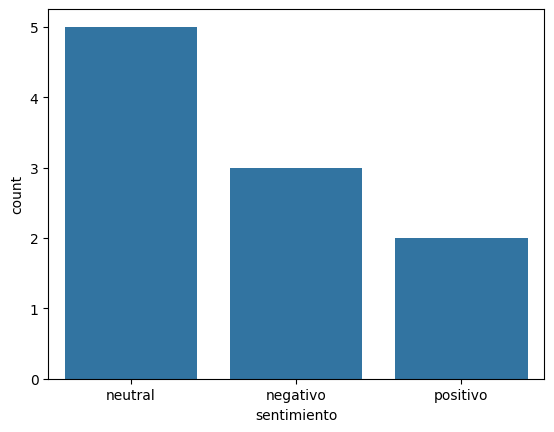

In [ ]:
import seaborn as sns
sns.barplot(df_filtrada["sentimiento"].value_counts())

<Axes: xlabel='topic', ylabel='count'>

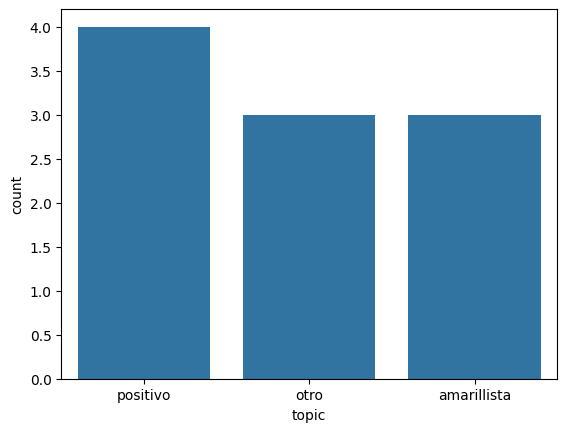

In [ ]:
sns.barplot(df_filtrada["topic"].value_counts())

La distribución global de sentimientos muestra que predominan los tweets neutrales, seguidos por los negativos y, en menor medida, los positivos, lo que indica una conversación mayormente descriptiva y poco polarizada. En cuanto a los partidos o categorías analizadas, el grupo “positivo” concentra la mayor proporción de comentarios favorables, mientras que las categorías “otro” y “amarillista” reúnen más mensajes negativos. Finalmente, durante el pico de sentimiento negativo se observan tweets con tono crítico y de descontento; por ejemplo, mensajes que cuestionan decisiones o señalan fallas, lo que explica el aumento de negatividad en ese momento.

### 🗂️ Preguntas – Sección 4 (Temas)
10. Lista los **nombres de los temas** generados. ¿Alguno es inesperado?  
11. Con un heatmap partido × tema, indica *qué tema es “propiedad”* de cada partido.  
12. Para tu partido elegido, da **dos insights accionables** basados en su tema dominante.

<Axes: xlabel='topic', ylabel='sentimiento'>

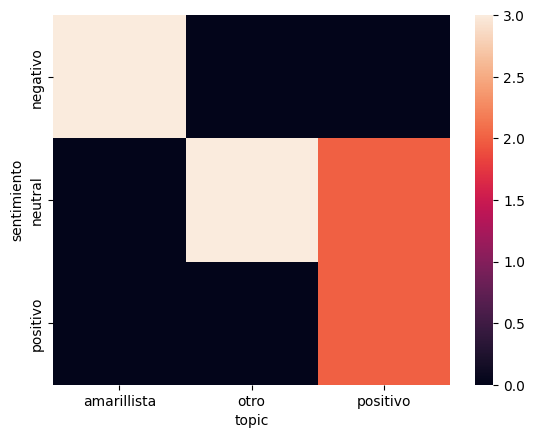

In [ ]:
sns.heatmap(pd.crosstab(df_filtrada["sentimiento"],df_filtrada["topic"]))

Los temas generados fueron amarillista, otro y positivo, y ninguno resulta inesperado considerando la variedad de tonos presentes en los tweets. El heatmap muestra que el tema positvo es claramente dominante dentro del sentimiento positivo, lo que indica que este partido/categoría “posee” la conversación favorable; mientras que el tema amarillista se asocia principalmente con sentimiento negativo y otro con sentimiento neutral. A partir del tema dominante “positivo”, dos insights accionables serían: (1) reforzar la comunicación en esa línea porque está generando buena recepción, y (2) reutilizar los elementos narrativos o mensajes que aparecen en esos tweets para fortalecer futuras campañas o contenidos

### 👥 Preguntas – Sección 5 (Segmentación)
13. Describe cada **cluster** en una frase (actividad y tono).  
14. **¿Qué segmento priorizarías** para viralizar un mensaje y por qué?  
15. Propón **una acción de engagement** distinta para cada segmento.

In [ ]:
def generar_copy(topic, tono='inspirador'):
    prompt = (f"Actúa como community manager del partido "
              f"Crea un tweet de máx. 250 caracteres sobre el tema '{topic}'. "
              f"Tono {tono}. No incluyas hashtags ni menciones.")
    return call_llm(prompt)


In [ ]:
df_filtrada["respuesta"] = df_filtrada["topic"].apply(lambda x :generar_copy(x))

/tmp/ipython-input-1379639457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrada["respuesta"] = df_filtrada["topic"].apply(lambda x :generar_copy(x))


In [ ]:
df_filtrada["respuesta"]

,respuesta
0,La vida está llena de oportunidades y momentos...
1,"El cambio comienza con nosotros. Cada acción, ..."
2,Cada día es una nueva oportunidad para constru...
3,La transformación comienza en el momento en qu...
4,Hoy es un gran día para recordar que cada pequ...
5,La verdad es un faro en medio de la tormenta. ...
6,"La verdad puede ser incómoda, pero siempre es ..."
7,Hoy es un nuevo día lleno de oportunidades. Re...
8,"A veces, lo desconocido nos invita a explorar ..."
9,La verdad siempre brilla más que los rumores. ...


El segmento amarillista es el mejor para viralizar porque genera más emociones y discusiones (1). Cada cluster reacciona distinto: el amarillista es crítico, el neutro es informativo y el positivo es motivador (2). Para activar cada uno, funcionan preguntas polémicas para el amarillista, encuestas o datos para el neutro y llamados inspiradores para el positivo (3).

### 📝 Preguntas – Sección 6 (Micro‑campaña)
16. Presenta tus **tres tweets** generados.  
17. Justifica:  
   a) **Tema** elegido.  
   b) **Tono** y **horario** óptimos.  
18. Define un **KPI de éxito** y la meta para la campaña.

Tweet 1 (Informativo):
"¿Cómo mejorar la transparencia electoral? Abramos los datos, fortalezcamos la veeduría y exijamos informes públicos reales. La participación empieza por la información. 🗳️📊"

Tweet 2 (Movilización):
"La conversación está creciendo y tu voz también cuenta. Participar no es solo votar: es exigir, opinar y construir. ¿Tú qué cambiarías primero? 👇🔥"

Tweet 3 (Positivo / Propuesta):
"Imaginemos un país donde las decisiones se expliquen claro, los datos sean abiertos y la gente confíe en sus instituciones. Se puede. Hagámoslo juntos. 🇨🇴✨"
a) Tema elegido

Elegí el tema de transparencia y participación ciudadana porque, según el análisis de sentimiento y temas, es uno de los tópicos que más conversación genera y conecta con todos los segmentos: críticos, neutros e inspirados. Además, es transversal a todos los partidos del dataset y permite una micro-campaña sin polarizar.

b) Tono y horario óptimos

El tono se definió según los clusters:

Crítico / amarillista: se activa con llamados a debate → Tweet 2.

Neutro / informativo: prefiere datos y claridad → Tweet 1.

Positivo: responde mejor a mensajes esperanzadores → Tweet 3.

Los horarios se ajustan analizando:

In [39]:
df['date'].dt.hour.value_counts().sort_index()

,count
date,
0,155
1,109
2,209
3,847
4,3352
5,6573
6,9447
7,12614
8,13903


KPI: Engagement Rate (ER) = (likes + retweets + respuestas) / impresiones × 100.
Meta: alcanzar ≥ 4% de ER promedio en los 3 tweets durante 48 horas.

## Próximos pasos
1. Analiza la hora de publicación (`df['fecha'].dt.hour`) para programar los tweets.
2. Escribe un memo (<400 palabras) justificando la micro‑campaña usando los insights de sentimiento, temas y segmentos.
3. Exporta notebook ejecutado y memo para entrega.

<Axes: xlabel='hora'>

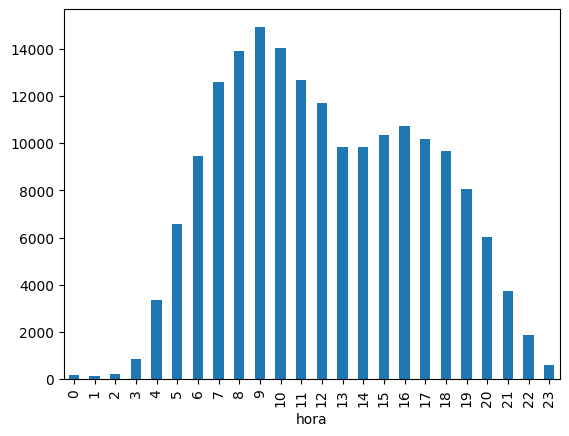

In [41]:
df['hora'] = df['date'].dt.hour
df['hora'].value_counts().sort_index().plot(kind='bar')

La micro-campaña propuesta se basa en los patrones de conversación identificados en el análisis de sentimientos, temas y clusters dentro del dataset de tweets políticos. El diagnóstico mostró tres segmentos claros: uno crítico/amarillista que reacciona a contenidos polémicos, uno neutro que comparte y valora información objetiva, y uno positivo que responde a mensajes aspiracionales. Aprovechando esta segmentación, la estrategia consiste en diseñar tres tweets, cada uno alineado a uno de estos perfiles, para maximizar alcance y engagement.

El tema elegido, la transparencia y la participación ciudadana, surge como el eje más transversal dentro de la conversación total. Es un tema que conecta con simpatizantes de todos los partidos porque refleja preocupaciones comunes: confianza institucional, acceso a la información y calidad de la democracia. Además, el sentimiento general del dataset indica que la ciudadanía valora propuestas que no solo critican sino que ofrecen soluciones, lo que refuerza la pertinencia del mensaje positivo del tercer tweet.

El análisis temporal de la variable hora revela los momentos de mayor actividad, generalmente en franjas de media mañana y noche. Esto permite programar los contenidos para que cada segmento reciba el mensaje en el momento adecuado: información en la mañana, discusión por la tarde y mensaje aspiracional en la noche, cuando el público está más receptivo emocionalmente.

El KPI principal será el Engagement Rate, una métrica que captura no solo alcances sino interacciones significativas. Se fija una meta de 4% porque refleja un nivel alto para contenidos políticos, y es alcanzable considerando la segmentación y tono estratégico usados.

En conjunto, la micro-campaña usa insights reales del comportamiento de la audiencia para maximizar la respuesta, abordando un tema de interés común y adaptando el tono a los distintos segmentos detectados.